# GPS MÓDULO 2

In [7]:
import pandas as pd
# opción mostrar hasta 500 columnas
pd.set_option('display.max_columns', 500)
# opción mostrar toda la info de una columna
# pd.set_option('display.max_colwidth', None)
# opción de que muestre hasta 3 decimales y suprima la notación científica
pd.set_option('display.float_format', lambda x: '%.3f' % x)
import numpy as np

In [2]:
# setear parámetros generales para los gráficos
import matplotlib.pyplot as plt
#plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=11)    # fontsize of the tick labels
plt.rc('ytick', labelsize=11)    # fontsize of the tick labels
plt.rc('legend', fontsize=9)    # legend fontsize
plt.rc('figure', titlesize=19)  # fontsize of the figure title

In [3]:
# también se puede usar
# with pd.option_context('display.max_rows', None, 'display.max_columns', None):  # more options can be specified also
#    print(data_agrup_type_state)

## 0. CARGAMOS DATASET DE PROPERATTI

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('properati.csv', index_col='Unnamed: 0')

In [8]:
df.head(2)

operation property_type place_name  \
0      sell            PH  Mataderos   
1      sell     apartment   La Plata   

                       place_with_parent_names country_name  \
0        |Argentina|Capital Federal|Mataderos|    Argentina   
1  |Argentina|Bs.As. G.B.A. Zona Sur|La Plata|    Argentina   

               state_name  geonames_id                  lat-lon     lat  \
0         Capital Federal  3430787.000  -34.6618237,-58.5088387 -34.662   
1  Bs.As. G.B.A. Zona Sur  3432039.000  -34.9038831,-57.9643295 -34.904   

      lon      price currency  price_aprox_local_currency  price_aprox_usd  \
0 -58.509  62000.000      USD                 1093959.000        62000.000   
1 -57.964 150000.000      USD                 2646675.000       150000.000   

   surface_total_in_m2  surface_covered_in_m2  price_usd_per_m2  price_per_m2  \
0               55.000                 40.000          1127.273      1550.000   
1                  nan                    nan               nan           nan   

   floor  rooms  expenses                                      properati_url  \
0    nan    nan       nan  http://www.properati.com.ar/15bo8_venta_ph_mat...   
1    nan    nan       nan  http://www.properati.com.ar/15bob_venta_depart...   

                                         description  \
0  2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...   
1  Venta de departamento en décimo piso al frente...   

                                               title  \
0                 2 AMB TIPO CASA SIN EXPENSAS EN PB   
1  VENTA Depto 2 dorm. a estrenar 7 e/ 36 y 37   ...   

                                     image_thumbnail  
0  https://thumbs4.properati.com/8/BluUYiHJLhgIIK...  
1  https://thumbs4.properati.com/7/ikpVBu2ztHA7jv...

In [9]:
# opción mostrar toda la info de una columna
pd.set_option('display.max_colwidth', None) # current 50

In [11]:
df.description.iloc[1]

'Venta de departamento en décimo piso al frente, a estrenar. Living comedor con ventanales hacia el balcón con pisos de madera. Cocina completa con doble mesada, muebles bajo mesada. Lavadero separado. Toilette.Dormitorio con placard. Segundo dormitorio a dividir. Calefacción por radiadorBaño completo.Balcón corrido. Posibilidad de cochera semicubierta. U$D 20.000                     Aviso publicado por Pixel Inmobiliario (Servicio de Páginas Web para Inmobiliarias).'

## 2. PANDAS 2

### Groupby y transform para completar nulos

Queremos completar nulos en price_aprox_usd con la media corresp al tipo de propiedad y state_name

In [38]:
df[['property_type','state_name','price_aprox_usd']].head()

property_type                    state_name  price_aprox_usd
0            PH               Capital Federal        62000.000
1     apartment        Bs.As. G.B.A. Zona Sur       150000.000
2     apartment               Capital Federal        72000.000
3            PH               Capital Federal        95000.000
4     apartment  Buenos Aires Costa Atlántica        64000.000

In [33]:
# mask de nulos
mask_nulos = df['price_aprox_usd'].isnull()

In [37]:
df[mask_nulos][['property_type','state_name','price_aprox_usd']].head()

property_type                state_name  price_aprox_usd
5          house                Entre Ríos              nan
20         house                   Córdoba              nan
41     apartment                   Córdoba              nan
62         house    Bs.As. G.B.A. Zona Sur              nan
67         house  Bs.As. G.B.A. Zona Oeste              nan

In [13]:
# Vamos a hacer la media pesada por el tipo de propiedad y el state name
df_groupby=df.groupby(['property_type','state_name'])

In [31]:
pd.set_option('display.max_rows', 100) # default= None significa todos ; el de inicio es 15

In [32]:
df_groupby['price_aprox_usd'].mean()

property_type  state_name                  
PH             Bs.As. G.B.A. Zona Norte        136045.022
               Bs.As. G.B.A. Zona Oeste        110474.793
               Bs.As. G.B.A. Zona Sur          110617.265
               Buenos Aires Costa Atlántica     89488.610
               Buenos Aires Interior           102302.851
               Capital Federal                 189433.373
               Chubut                                 nan
               Corrientes                      124571.429
               Córdoba                         351597.542
               Entre Ríos                       61692.040
               Mendoza                         247500.000
               Misiones                         57018.400
               Neuquén                         119619.671
               Río Negro                        94759.515
               Salta                                  nan
               San Luis                         85846.020
               Santa Fe     

In [40]:
# Aplicamos el transform al groupby combinado al lambda
df_groupby['price_aprox_usd'].transform(lambda x: x.fillna(x.mean()))

0         62000.000
1        150000.000
2         72000.000
3         95000.000
4         64000.000
            ...    
121215   870000.000
121216   498000.000
121217   131500.000
121218    95900.000
121219   129000.000
Name: price_aprox_usd, Length: 121220, dtype: float64

In [41]:
#Chequeamos que esté haciendo lo que queríamos que haga
# Recordemos los nulos
df[mask_nulos][['property_type','state_name','price_aprox_usd']].head()

property_type                state_name  price_aprox_usd
5          house                Entre Ríos              nan
20         house                   Córdoba              nan
41     apartment                   Córdoba              nan
62         house    Bs.As. G.B.A. Zona Sur              nan
67         house  Bs.As. G.B.A. Zona Oeste              nan

In [43]:
df_groupby['price_aprox_usd'].transform(lambda x: x.fillna(x.mean())).iloc[67]

218529.7733890436

In [44]:
media_check_fill=df_groupby['price_aprox_usd'].mean()

media_check_fill[('house','Bs.As. G.B.A. Zona Oeste')]

218529.77338904355

### Pivot table

In [61]:
# Propiedades de Capital Federal
df_capital=df[df['state_name']=='Capital Federal']

In [62]:
df_capital.pivot_table(index='place_name',columns='property_type',
                       aggfunc={'price_aprox_usd':[np.mean,'count']})

price_aprox_usd                                      \
                               count                                mean   
property_type                     PH apartment   house  store         PH   
place_name                                                                 
Abasto                        13.000    77.000   3.000  8.000 176353.846   
Agronomía                      7.000    27.000   2.000  1.000 210714.286   
Almagro                       65.000   857.000  30.000 34.000 214636.923   
Balvanera                     35.000   555.000   6.000 35.000 179942.857   
Barracas                      41.000   310.000  43.000 14.000 196743.902   
Barrio Norte                  12.000   952.000   7.000 50.000 216750.000   
Belgrano                      43.000  2338.000 100.000 53.000 291858.140   
Boca                          13.000   169.000  23.000  6.000 166523.077   
Boedo                         31.000   764.000  42.000 21.000 181290.323   
Caballito                     72.000  1886.000  64.000 34.000 222650.000   
Capital Federal               42.000   419.000 427.000 70.000 161164.286   
Catalinas                        nan     1.000     nan  1.000        nan   
Centro / Microcentro             nan   158.000   1.000 55.000        nan   
Chacarita                     17.000   185.000   7.000  6.000 213705.882   
Coghlan                       20.000   208.000  16.000  5.000 214645.000   
Colegiales                    31.000   281.000  25.000  9.000 254254.839   
Congreso                       2.000   268.000   1.000 15.000 115000.000   
Constitución                  21.000   171.000   5.000 12.000 134833.333   
Flores                       100.000  1031.000  91.000 57.000 161071.000   
Floresta                      70.000   281.000  67.000 13.000 161195.714   
Las Cañitas                    2.000   127.000   2.000  1.000 219000.000   
Liniers                       80.000   259.000  46.000 11.000 142317.500   
Mataderos                    123.000   143.000 115.000 23.000 123596.748   
Monserrat                     16.000   436.000   5.000 53.000 160650.000   
Monte Castro                  19.000    41.000  13.000  1.000 164915.789   
Nuñez                         28.000   620.000  39.000 22.000 300732.143   
Once                           2.000   138.000     nan 23.000 125000.000   
Palermo                      104.000  2258.000  63.000 93.000 276822.115   
Palermo Chico                  1.000   172.000  16.000  2.000 695000.000   
Palermo Hollywood             15.000   434.000   9.000 20.000 204466.667   
Palermo Soho                   9.000   295.000   9.000  8.000 259222.222   
Palermo Viejo                  2.000    28.000   6.000  4.000 254500.000   
Parque Avellaneda             19.000    24.000  12.000    nan 137578.947   
Parque Centenario              6.000    59.000     nan  1.000 221666.667   
Parque Chacabuco              25.000    78.000  32.000  3.000 147640.000   
Parque Chas                    3.000    34.000   5.000  2.000 266666.667   
Parque Patricios              37.000   220.000  20.000 22.000 152372.973   
Paternal                      37.000    98.000  19.000 11.000 163372.973   
Pompeya                       14.000    16.000  19.000 10.000 140357.143   
Puerto Madero                    nan   553.000   4.000 10.000        nan   
Recoleta                      10.000  1329.000   3.000 82.000 211600.000   
Retiro                           nan   202.000   2.000 18.000        nan   
Saavedra                      44.000   413.000  43.000 10.000 193152.273   
San Cristobal                 47.000   493.000  17.000 23.000 181219.149   
San Nicolás                    4.000   151.000   2.000 17.000 203750.000   
San Telmo                     27.000  1069.000  13.000 53.000 265777.778   
Tribunales                     2.000    67.000     nan 22.000 140000.000   
Velez Sarsfield               15.000    10.000  11.000  1.000 149093.333   
Versalles                     10.000    18.000  24.000    nan 179400.

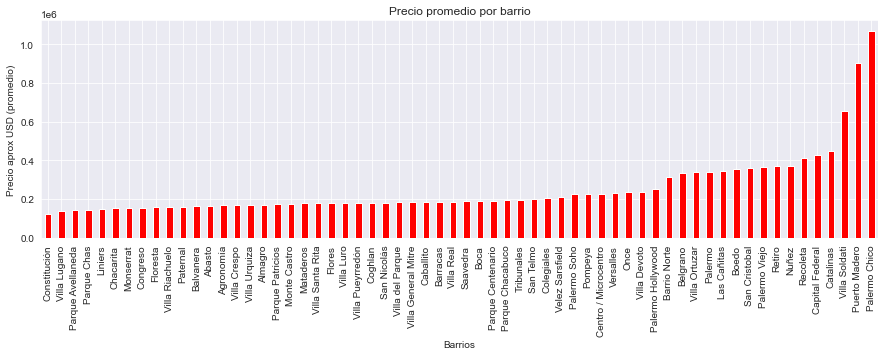

In [63]:
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.plot.html
sns.set_style('darkgrid')
df_capital.pivot_table(index='place_name',values='price_aprox_usd')\
          .sort_values(by='price_aprox_usd')\
          .plot(kind='bar',figsize=(15,4),title='Precio promedio por barrio',
                xlabel='Barrios',ylabel='Precio aprox USD (promedio)',color='red',legend=False);

### Merge + groupby (+lambda) para sacar outliers

Primero un groupby combinado con lambda para calcular el percentil 90 por barrio

In [67]:
df_groupby_barrios=df_capital.groupby('place_name')

In [68]:
umbral_90=df_groupby_barrios['price_aprox_usd'].aggregate(lambda x: np.percentile(x.dropna(),90))

In [73]:
umbral_90

place_name
Abasto                  320000.000
Agronomía               271000.000
Almagro                 290000.000
Balvanera               250000.000
Barracas                340000.000
Barrio Norte            615000.000
Belgrano                707749.717
Boca                    222000.000
Boedo                   704462.000
Caballito               340000.000
Capital Federal         912847.000
Catalinas               530000.000
Centro / Microcentro    524430.000
Chacarita               223000.000
Coghlan                 325200.000
Colegiales              390500.000
Congreso                255000.000
Constitución            162000.000
Flores                  350000.000
Floresta                290000.000
Las Cañitas             698900.000
Liniers                 265000.000
Mataderos               320000.000
Monserrat               265000.000
Monte Castro            296300.000
Nuñez                   602000.000
Once                    356000.000
Palermo                 695000.000
Palermo C

Unimos el resultado del groupby con un merge a nuestro dataframe original

In [69]:
df_capital_new=df_capital.merge(umbral_90.reset_index().rename(columns={'price_aprox_usd':'percentil_90'}),
                how='left',on='place_name')

In [72]:
df_capital_new.head(2)

operation property_type place_name                place_with_parent_names  \
0      sell            PH  Mataderos  |Argentina|Capital Federal|Mataderos|   
1      sell     apartment  Mataderos  |Argentina|Capital Federal|Mataderos|   

  country_name       state_name  geonames_id                  lat-lon     lat  \
0    Argentina  Capital Federal  3430787.000  -34.6618237,-58.5088387 -34.662   
1    Argentina  Capital Federal  3430787.000  -34.6522615,-58.5229825 -34.652   

      lon     price currency  price_aprox_local_currency  price_aprox_usd  \
0 -58.509 62000.000      USD                 1093959.000        62000.000   
1 -58.523 72000.000      USD                 1270404.000        72000.000   

   surface_total_in_m2  surface_covered_in_m2  price_usd_per_m2  price_per_m2  \
0               55.000                 40.000          1127.273      1550.000   
1               55.000                 55.000          1309.091      1309.091   

   floor  rooms  expenses                                      properati_url  \
0    nan    nan       nan  http://www.properati.com.ar/15bo8_venta_ph_mat...   
1    nan    nan       nan  http://www.properati.com.ar/15bod_venta_depart...   

                                         description  \
0  2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...   
1  2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...   

                                      title  \
0        2 AMB TIPO CASA SIN EXPENSAS EN PB   
1  2 AMB 3ER PISO CON ASCENSOR APTO CREDITO   

                                     image_thumbnail  percentil_90  
0  https://thumbs4.properati.com/8/BluUYiHJLhgIIK...    320000.000  
1  https://thumbs4.properati.com/5/SXKr34F_IwG3W_...    320000.000

Filtramos el dataset según la columna percentil_90

In [74]:
df_capital_clean_for_plot=df_capital_new[df_capital_new['price_aprox_usd']<df_capital_new['percentil_90']]

Hacemos el plot con seaborn usando boxplots

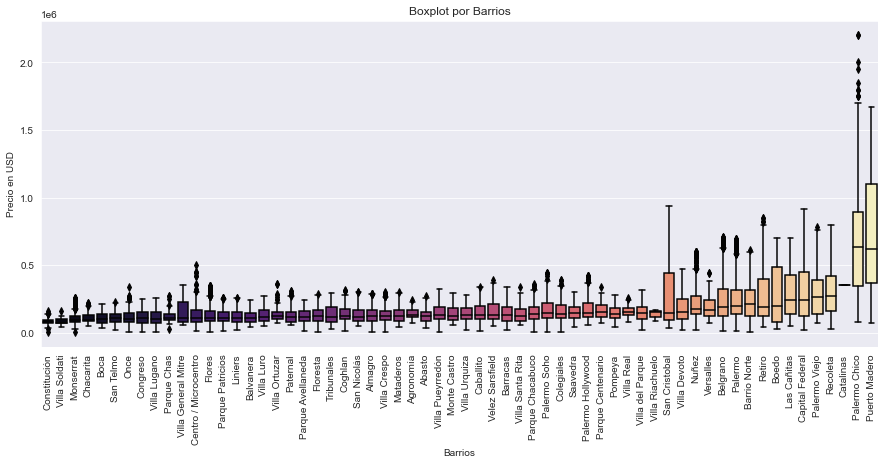

In [77]:
sns.set_style('darkgrid')
fig,ax0 = plt.subplots(1, 1, figsize=(15, 6))
ax0=sns.boxplot(data=df_capital_clean_for_plot,
                x='place_name',y='price_aprox_usd',palette='magma',
                order=df_groupby_barrios['price_aprox_usd'].median().sort_values().index.values,
                ax=ax0)
ax0.set(xlabel = "Barrios", ylabel = "Precio en USD", title = "Boxplot por Barrios")
plt.xticks(rotation=90);

## 3. DATA WRANGLING

### Qcut para filtrar superficies muy grandes

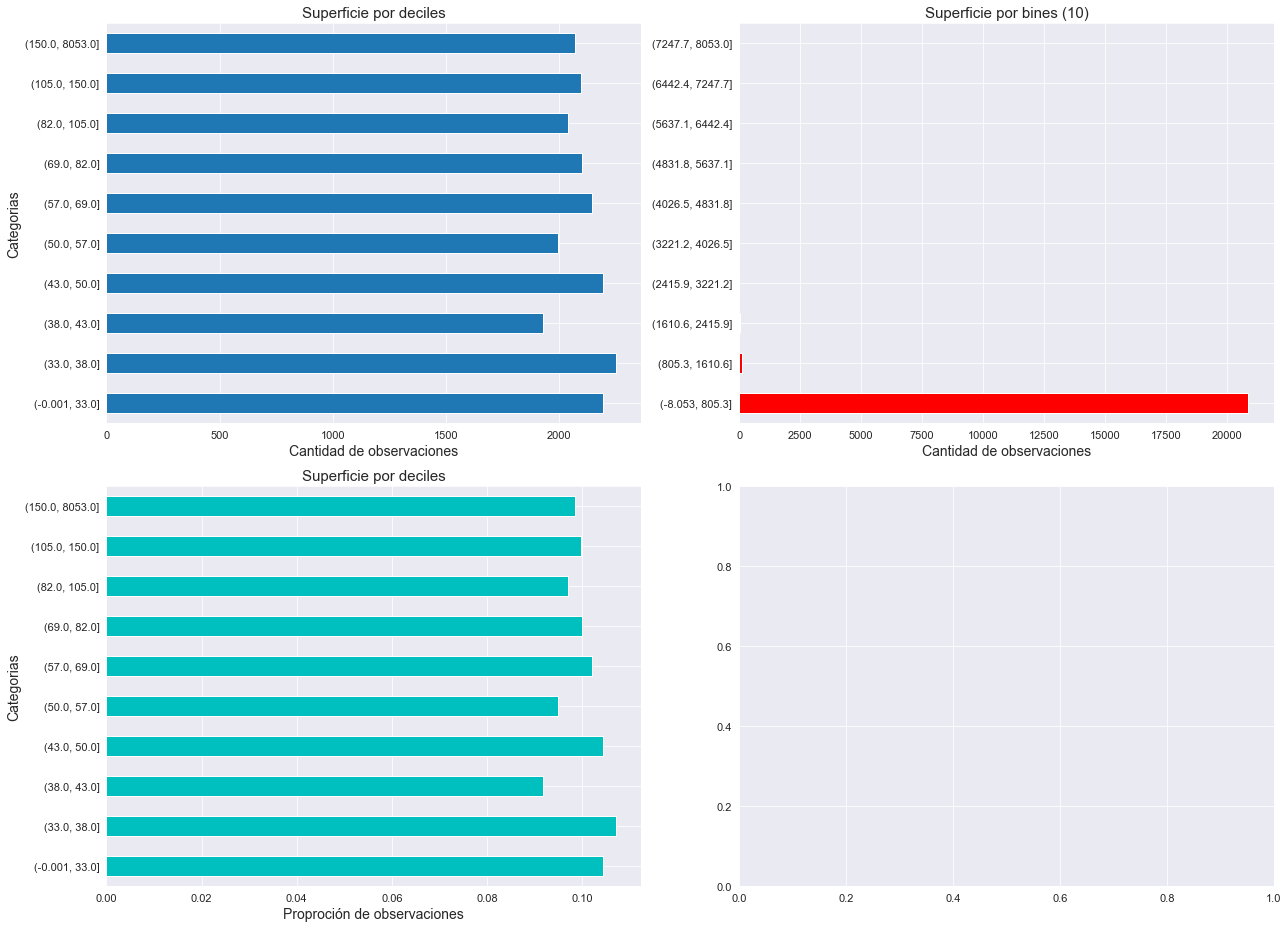

In [49]:
fig,axs = plt.subplots(2, 2, figsize=(18, 13))

#Dividimos la superficie usando qcut y contamos la cant. de observaciones
pd.qcut(df_capital_clean_for_plot['surface_total_in_m2'],q=10)\
  .value_counts()\
  .sort_index()\
  .plot(kind='barh',ax=axs[0,0])
axs[0,0].set(xlabel = "Cantidad de observaciones", ylabel = "Categorias", title = "Superficie por deciles")

# Dividimos la superficie usando cut con 10 bins
pd.cut(df_capital_clean_for_plot['surface_total_in_m2'],bins=10)\
  .value_counts()\
  .sort_index()\
  .plot(kind='barh',ax=axs[0,1],color='red')
axs[0,1].set(xlabel = "Cantidad de observaciones", ylabel = "", title = "Superficie por bines (10)")

# Repetimos la figura 1 pero viendo la proporción de observacciones
pd.qcut(df_capital_clean_for_plot['surface_total_in_m2'],q=10)\
  .value_counts(normalize=True)\
  .sort_index()\
  .plot(kind='barh',ax=axs[1,0],color='c')
axs[1,0].set(xlabel = "Proproción de observaciones", ylabel = "Categorias", title = "Superficie por deciles")

plt.tight_layout()

In [42]:
#filtramos la base generando una maskara booleana
maskara_filtrar_superficies=pd.qcut(df_capital_clean_for_plot['surface_total_in_m2'],q=10).astype(str)!='(150.0, 8053.0]'

In [43]:
df_capital_clean_for_plot_superficie=df_capital_clean_for_plot[maskara_filtrar_superficies]

In [44]:
df_capital_clean_for_plot_superficie.shape

(23983, 26)

### Variables categóricas y get dummies

In [78]:
df_clean_dummies=pd.get_dummies(df_capital_clean_for_plot,columns=['property_type'],drop_first=True)

In [79]:
# pd.set_option('display.max_colwidth', 50)
df_clean_dummies.head()

operation place_name                place_with_parent_names country_name  \
0      sell  Mataderos  |Argentina|Capital Federal|Mataderos|    Argentina   
1      sell  Mataderos  |Argentina|Capital Federal|Mataderos|    Argentina   
2      sell    Liniers    |Argentina|Capital Federal|Liniers|    Argentina   
3      sell   Belgrano   |Argentina|Capital Federal|Belgrano|    Argentina   
4      sell   Belgrano   |Argentina|Capital Federal|Belgrano|    Argentina   

        state_name  geonames_id                  lat-lon     lat     lon  \
0  Capital Federal  3430787.000  -34.6618237,-58.5088387 -34.662 -58.509   
1  Capital Federal  3430787.000  -34.6522615,-58.5229825 -34.652 -58.523   
2  Capital Federal  3431333.000  -34.6477969,-58.5164244 -34.648 -58.516   
3  Capital Federal  3436077.000   -34.5598729,-58.443362 -34.560 -58.443   
4  Capital Federal  3436077.000   -34.5598729,-58.443362 -34.560 -58.443   

       price currency  price_aprox_local_currency  price_aprox_usd  \
0  62000.000      USD                 1093959.000        62000.000   
1  72000.000      USD                 1270404.000        72000.000   
2  95000.000      USD                 1676227.500        95000.000   
3 138000.000      USD                 2434941.000       138000.000   
4 195000.000      USD                 3440677.500       195000.000   

   surface_total_in_m2  surface_covered_in_m2  price_usd_per_m2  price_per_m2  \
0               55.000                 40.000          1127.273      1550.000   
1               55.000                 55.000          1309.091      1309.091   
2                  nan                    nan               nan           nan   
3               45.000                 40.000          3066.667      3450.000   
4               65.000                 60.000          3000.000      3250.000   

   floor  rooms  expenses                                      properati_url  \
0    nan    nan       nan  http://www.properati.com.ar/15bo8_venta_ph_mat...   
1    nan    nan       nan  http://www.properati.com.ar/15bod_venta_depart...   
2    nan    nan       nan  http://www.properati.com.ar/15boh_venta_ph_lin...   
3    nan    nan       nan  http://www.properati.com.ar/15bot_venta_depart...   
4    nan    nan       nan  http://www.properati.com.ar/15bou_venta_depart...   

                                         description  \
0  2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...   
1  2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...   
2  PH 3 ambientes con patio. Hay 3 deptos en lote...   
3  EXCELENTE MONOAMBIENTE A ESTRENAR AMPLIO SUPER...   
4  EXCELENTE DOS AMBIENTES  ESTRENAR AMPLIO SUPER...   

                                               title  \
0                 2 AMB TIPO CASA SIN EXPENSAS EN PB   
1           2 AMB 3ER PISO CON ASCENSOR APTO CREDITO   
2                       PH 3 amb. cfte. reciclado      
3  JOSE HERNANDEZ 1400 MONOAMBIENTE  ESTRENAR CAT...   
4  JOSE HERNANDEZ   1400 DOS AMBIENTES ESTRENAR ,...   

                                     image_thumbnail  percentil_90  \
0  https://thumbs4.properati.com/8/BluUYiHJLhgIIK...    320000.000   
1  https://thumbs4.properati.com/5/SXKr34F_IwG3W_...    320000.000   
2  https://thumbs4.properati.com/3/DgIfX-85Mog5SP...    265000.000   
3  https://thumbs4.properati.com/1/IHxARynlr8sPEW...    707749.717   
4  https://thumbs4.properati.com/2/J3zOjgaFHrkvnv...    707749.717   

   property_type_apartment  property_type_house  property_type_store  
0                        0                    0                    0  
1                        1                    0                    0  
2                        0                    0                    0  
3                        1                    0                    0  
4                        1                    0                    0

Vamos a usar la columna dummie para quedarnos solo con los departamentos

In [47]:
df_clean_dummies_dpto=df_clean_dummies[df_clean_dummies['property_type_apartment']==1]

### Plotly

In [92]:
import plotly.express as px
import plotly as pl
pl.offline.init_notebook_mode(connected=True)

In [83]:
# df_capital_clean_for_plot_superficie = df_capital_clean_for_plot.copy()

In [93]:
# dropeo los nans porque sino no me deja ajustar el size a una variable que tiene valores faltantes
fig = px.scatter(data_frame = df_capital_clean_for_plot_superficie.dropna(subset=['price_usd_per_m2',
                                                                                   'surface_total_in_m2',
                                                                                   'surface_covered_in_m2']), 
                 x = "price_usd_per_m2", y = "surface_total_in_m2",
                 size='surface_covered_in_m2',size_max=45,
                 color = "property_type", opacity = 0.6,
                 width=800, height=500,
                 hover_data={'property_type':False})

fig.update_layout(
    title='Relación entre precio y superficie',
    yaxis=dict(title='Superficie en m2'),
    xaxis=dict(title='Precio por m2 (USD)'))

fig.update_xaxes(rangeslider_visible=True)

fig.show()

**Plotly en 3D**

In [94]:
fig = px.scatter_3d(df_capital_clean_for_plot_superficie, 
                    x="price_usd_per_m2", y="surface_total_in_m2", 
                    z="surface_covered_in_m2", color="property_type")

fig.update_layout(
    title='Relación entre precio, superficie total y superficie cubierta',
    scene = dict(xaxis_title='Precio por m2 (USD)',
                 yaxis_title='Sup. Total en m2',
                 zaxis_title='Sup. Cubierta en m2'))
fig.show()

In [95]:
df_capital_clean_for_plot_superficie.columns.values

array(['operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name',
       'geonames_id', 'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'image_thumbnail', 'percentil_90'],
      dtype=object)

In [96]:
fig = px.sunburst(df_capital_clean_for_plot_superficie.dropna(subset=['price_usd_per_m2',
                                                                                   'surface_total_in_m2',
                                                                                   'surface_covered_in_m2']), 
                  path=['property_type', 'place_name'], values='price_usd_per_m2',
                  color='surface_total_in_m2')

fig.update_layout(
    title='Relación tipo de inmueble y barrios (precio total y superficie)')

fig.show()

### Hagamos Mapas con Plotly

In [97]:
df_capital_clean_for_plot_superficie.dropna(subset=['lat','lon']).head(2)

operation property_type place_name                place_with_parent_names  \
0      sell            PH  Mataderos  |Argentina|Capital Federal|Mataderos|   
1      sell     apartment  Mataderos  |Argentina|Capital Federal|Mataderos|   

  country_name       state_name  geonames_id                  lat-lon     lat  \
0    Argentina  Capital Federal  3430787.000  -34.6618237,-58.5088387 -34.662   
1    Argentina  Capital Federal  3430787.000  -34.6522615,-58.5229825 -34.652   

      lon     price currency  price_aprox_local_currency  price_aprox_usd  \
0 -58.509 62000.000      USD                 1093959.000        62000.000   
1 -58.523 72000.000      USD                 1270404.000        72000.000   

   surface_total_in_m2  surface_covered_in_m2  price_usd_per_m2  price_per_m2  \
0               55.000                 40.000          1127.273      1550.000   
1               55.000                 55.000          1309.091      1309.091   

   floor  rooms  expenses                                      properati_url  \
0    nan    nan       nan  http://www.properati.com.ar/15bo8_venta_ph_mat...   
1    nan    nan       nan  http://www.properati.com.ar/15bod_venta_depart...   

                                         description  \
0  2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...   
1  2 AMBIENTES 3ER PISO LATERAL LIVING COMEDOR AM...   

                                      title  \
0        2 AMB TIPO CASA SIN EXPENSAS EN PB   
1  2 AMB 3ER PISO CON ASCENSOR APTO CREDITO   

                                     image_thumbnail  percentil_90  
0  https://thumbs4.properati.com/8/BluUYiHJLhgIIK...    320000.000  
1  https://thumbs4.properati.com/5/SXKr34F_IwG3W_...    320000.000

In [98]:
fig = px.scatter_mapbox(df_capital_clean_for_plot_superficie.dropna(subset=['lat','lon','price_usd_per_m2']),
                        title='Inmuebles CABA - por tipo de propiedad y precio x m2 (USD)',
                        lat="lat", lon="lon", color="property_type", size="price_usd_per_m2",
                  color_continuous_scale=px.colors.cyclical.IceFire, size_max=20, zoom=10,
                  mapbox_style="stamen-toner")#open-street-map
#open-street-map, white-bg, carto-positron, carto-darkmatter, stamen-terrain, stamen-toner, stamen-watercolor

fig.show()

In [67]:
fig = px.scatter_mapbox(df_clean_dummies_dpto.dropna(subset=['lat','lon','price_usd_per_m2']),
                        title='Apartamentos - precio m2 (USD) y superficie total',
                        lat="lat", lon="lon", color="price_usd_per_m2", size="surface_total_in_m2",
                        color_continuous_scale=px.colors.sequential.Hot, 
                        range_color=[0,8000],
                        size_max=15, zoom=10,
                        mapbox_style="stamen-toner")#open-street-map
#open-street-map, white-bg, carto-positron, carto-darkmatter, stamen-terrain, stamen-toner, stamen-watercolor
#px.colors.cyclical.IceFire
# https://plotly.com/python/builtin-colorscales/ (lista de colormaps)

fig.show()